# Sobre o projeto: Previsão Multiclasse do Risco de Obesidade

Abaixo temos as informações sobre o dicionário dos dados e o objetivo deste projeto.

**Dados dos Indivíduos Registrados:**

- **id:** Número de Identificação Individual para cada uma das entradas registradas.
- **Gender:** Indica o gênero do indivíduo com Masculino/Feminino. Isso pode ser codificado posteriormente.
- **Age:** Indica a idade do indivíduo. Tenha em mente que este valor não é um número inteiro, mas sim um número decimal. Isso pode ser útil posteriormente.
- **Weight:** Indica o peso do indivíduo. Este também é um número decimal. Você também pode usar isso para gerar uma nova característica conforme as Classes de Peso. Isso está em Kg.
- **Height:** Indica a altura do indivíduo. Isso está em metros.
- **Family_history_with_overweight:** Indica se esta pessoa tem histórico de sobrepeso em sua família, com um valor binário categórico de sim e não.
- **FAVC:** Indica o consumo frequente de alimentos calóricos. Este também é um valor binário categórico com sim/não.
- **FCVC:** Indica a frequência de consumo de vegetais. FCVC > 2 significa ingestão positiva de vegetais em todas as refeições e FCVC 2 significa ingestão zero de vegetais em algumas refeições.
- **CAEC:** Indica a frequência de sub-refeições entre as refeições principais. Existem 4 categorias: "Não", "Às vezes", "Frequentemente" e "Sempre".
- **NCP:** Indica o número de refeições por dia.
- **MTRANS:** Indica o meio de transporte usual e consiste em cinco níveis: Automóvel, Motocicleta, Bicicleta, Transporte Público e Caminhada.
- **CALC:** Indica o consumo de álcool.
- **TUE:** Indica o tempo gasto em dispositivos tecnológicos.
- **FAF:** Indica a frequência de atividade física.
- **SCC:** Indica o evento de monitoramento da ingestão calórica de alimentos com Sim/Não.
- **CH2O:** Indica a quantidade de ingestão diária de água em litros.
- **SMOKE:** Indica se o indivíduo é fumante ou não.


Seu Objetivo: O objetivo desta competição é usar vários fatores para prever o risco de obesidade em indivíduos, que está relacionado à doença cardiovascular. Boa sorte!

# Importando bibliotecas

In [48]:
import pandas as pd # Importando a biblioteca Pandas como principal ferramenta para análise de dados.
import seaborn as sns # Importando a biblioteca Seaborn para visualização dos dados
import numpy as np # Importando a biblioteca NumPy para dar suporte nos calculos
import matplotlib.pyplot as plt # Importando a biblioteca Matplotlib para visualização dos dados.
%matplotlib inline

from sklearn.model_selection import train_test_split # Importando o módulo Train_test_split para treinar e testar o modelo
from sklearn.pipeline import Pipeline # Importando pipeline para transformar o nosso modelo 
                                      # e não ter problemas de Dataleakage
from sklearn.preprocessing import StandardScaler, OneHotEncoder # Importando um escalonador e um codificador 
from sklearn.compose import ColumnTransformer # Importando o módulo para transformar as colunas. 

from sklearn.metrics import accuracy_score # Importando a métrica acurácia para o nosso modelo. 

from sklearn.ensemble import RandomForestClassifier # Importando o nosso algoritmo de classificação 

from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV # Validação e otimização

In [49]:
df_treino = pd.read_csv('C:\\Users\\Roberto\\notebookspython\\playground-series-s4e2 (2)\\train.csv')
df_treino.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [50]:
df_teste = pd.read_csv('C:\\Users\\Roberto\\notebookspython\\playground-series-s4e2 (2)\\test.csv')
df_teste.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


# Analisando os dados

In [51]:
print(df_treino.info())
print('')
print('_' * 100)
print('')
print(df_teste.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [52]:
df_treino.duplicated().sum()

0

In [53]:
df_treino.nunique()

id                                20758
Gender                                2
Age                                1703
Height                             1833
Weight                             1979
family_history_with_overweight        2
FAVC                                  2
FCVC                                934
NCP                                 689
CAEC                                  4
SMOKE                                 2
CH2O                               1506
SCC                                   2
FAF                                1360
TUE                                1297
CALC                                  3
MTRANS                                5
NObeyesdad                            7
dtype: int64

In [54]:
df_teste.duplicated().sum()

0

In [55]:
df_teste.nunique()

id                                13840
Gender                                2
Age                                1539
Height                             1739
Weight                             1798
family_history_with_overweight        2
FAVC                                  2
FCVC                                828
NCP                                 649
CAEC                                  4
SMOKE                                 2
CH2O                               1366
SCC                                   2
FAF                                1260
TUE                                1172
CALC                                  4
MTRANS                                5
dtype: int64

Podemos ver que temos 8 colunas do tipo float64 (ponto flutuante), 1 coluna do tipo int64 (inteiro) e 9 colunas do tipo Object (Objeto) nos dados de treino. Temos 18 colunas no total e um consumo de memória de aproximadamente 2.9mb. A diferença para os dados de teste é que temos 17 colunas (foi excluida a coluna da variável target e o consumo de memória é menor). 

Também podemos observar que não existem colunas com valores nulos. 

Também notamos que o CALC dos dados de treino e o CALC dos dados de teste são diferentes. O CALC dos dados de treino possui apenas 3 categorias, enquanto o dos dados de teste possui 4 categorias.

In [56]:
df_treino.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


Vamos analisar esta tabela descritiva e o que ela traz consigo. Lembrando que o describe retorna estatisticas descritivas para variáveis numéricas, ou seja, as variáveis categóricas não estão incluídas. 

Podemos ver que a primeira grande variável numérica, "Age", que traz a idade de cada individuo, tem uma média de 23, isto significa que as pessoas que estamos analisando da base de dados de treino tem a idade média de 23.8 anos. Podemos ver também que o seu desvio-padrão (std) é de 5.68. Um desvio padrão de 5.68 sugere que os valores tendem a variar em 5.68 unidades em torno da média que é de 23.8 anos. Quanto maior o desvio-padrão, maior é a dispersão dos valores em relação a média. Portanto, teóricamente, os valores de "Age" podem variar de (23.8 - 5.68) até (23.8 + 5.68). 

Ainda sobre a variável "Age" que representa a Idade, vemos também o min, 25%, 50%, 75% e o max. O min mostra o valor mínimo, que é 14. O max mostra o valor máximo, que é 61. Em relação aos 25% (primeiro quartil), vemos que 25% dos valores da coluna "Age" são iguais a 20. Em relação aos 50% (mediana ou segundo quartil), vemos que 50% dos valores são iguais ou menores do que 22.8. Em relação aos 75%, vemos que 75% dos valores são iguais ou menores do que 26. Estes quartis fornecem informações sobre a distribuição dos dados, ou seja, o fato da mediana ser igual a 22.8 sugere que metade dos membros tem menos do que 22.8 anos. Em relação a média e ao desvio padrão, estes quartis ajudam a entender a distribuição dos dados: O fato do primeiro quartil ser 20 e a mediana ser 22.8 indicam que uma quantidade significativa de pessoas na nossa base de dados são jovens.

Doenças cardiovasculares têm padrões de ocorrência diferentes em diferentes faixas etárias. Portanto, entender a distribuição etária da amostra pode ajudar a contextualizar as descobertas do modelo que montaremos.

Podemos ver que a segunda grande variável numérica "Height" que representa a altura em metros, tem uma média de 1.70 e um desvio padrão de 0.08. Também mostra que a altura minima é de 1.45 e a máxima de 1.97, enquanto 25% dos valores são iguais ou menores do que 1.63, 50% dos valores são iguais ou menores do que 1.70, e 75% dos valores são iguais ou menores do que 1.76. 

Podemos ver que a terceira grande variável numérica "Weight" que representa o peso em kg, tem uma média de 87.8 e um desvio padrão de 26.3. Também mostra que o peso minimo é de 39 e a máxima de 165, enquanto 25% dos valores são iguais ou menores do que 66, 50% dos valores são iguais ou menores do que 84, e 75% dos valores são iguais ou menores do que 111.

De acordo com o dicionário de dados, a variável FCVC indica a frequência de consumo de vegetais. FCVC > 2 significa ingestão positiva de vegetais em todas as refeições e FCVC 2 significa ingestão zero de vegetais em algumas refeições. Podemos ver que a média de consumo de vegetais é de 2.44 e o desvio padrão de 0.5. 25% dos valores na variável FCVC são iguais ou menores do que 2, o que significa que 25% das pessoas comem vegetais em algumas refeições ou menos, indicando que elas tem uma frequência de consumo de vegetais menor do que a média da amostra.

Estas análises descritivas também servem para as outras variáveis numéricas. Prosseguiremos com o nosso estudo! 

# Análise gráfica

Vamos realizar agora uma breve análise para verificar como os dados estão distribuidos e isso nos ajudará a escolhermos um bom algoritmo

Estas análises, como dito, nos ajudarão no processo de escolhermos os nossos melhores algoritmos de Machine Learning. 

# Target

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Overweight_Level_II'),
  Text(1, 0, 'Normal_Weight'),
  Text(2, 0, 'Insufficient_Weight'),
  Text(3, 0, 'Obesity_Type_III'),
  Text(4, 0, 'Obesity_Type_II'),
  Text(5, 0, 'Overweight_Level_I'),
  Text(6, 0, 'Obesity_Type_I')])

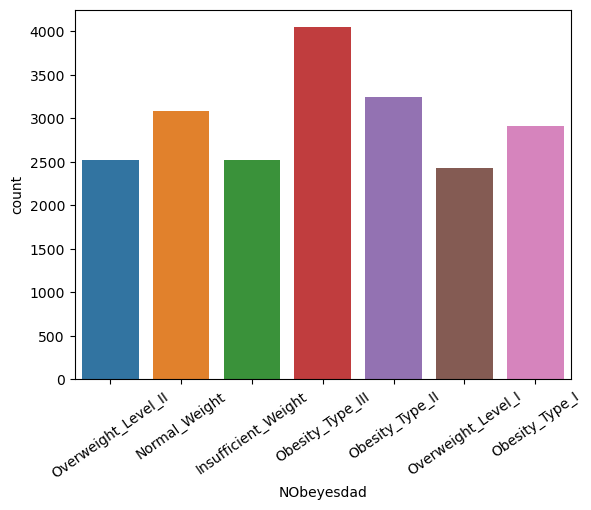

In [57]:
sns.countplot(x = 'NObeyesdad', data = df_treino)
plt.xticks(rotation = 35)

Estamos vendo a variável target, a variável que queremos prever. Neste countplot, estamos verificando se os dados estão muito desbalanceados. 

Podemos ver que os dados estão bem balanceados.

# Age

<Axes: xlabel='Age', ylabel='Count'>

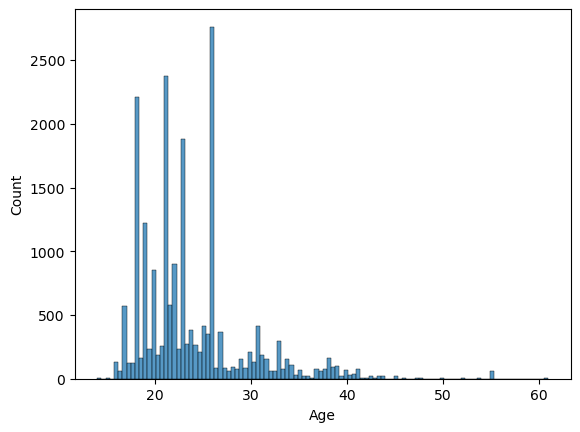

In [58]:
sns.histplot(x = 'Age', data = df_treino)

Confirmamos o que vimos na análise do describe: uma grande quantidade de pessoas na nossa base de dados são jovens.

# Weight 

<Axes: xlabel='Weight', ylabel='Count'>

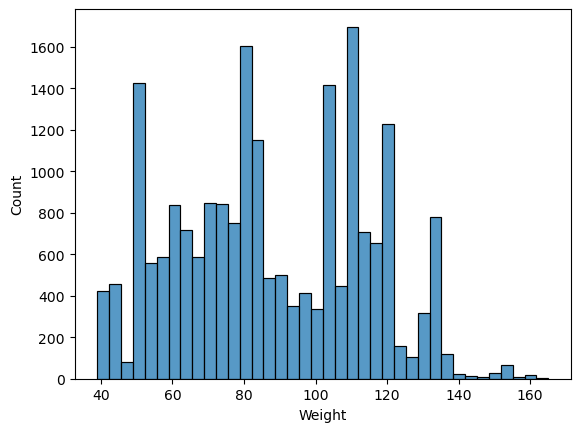

In [59]:
sns.histplot(x = 'Weight', data = df_treino)

# Height

<Axes: xlabel='Height', ylabel='Count'>

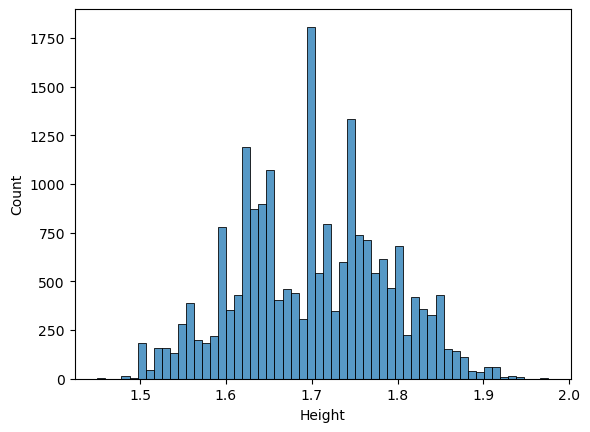

In [60]:
sns.histplot(x = 'Height', data = df_treino)

# Family_history_with_overweight

<Axes: xlabel='family_history_with_overweight', ylabel='count'>

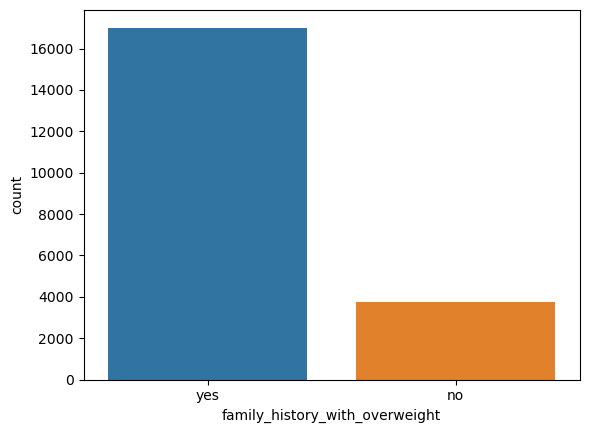

In [61]:
sns.countplot(x = 'family_history_with_overweight', data = df_treino)

# FAVC

<Axes: xlabel='FAVC', ylabel='count'>

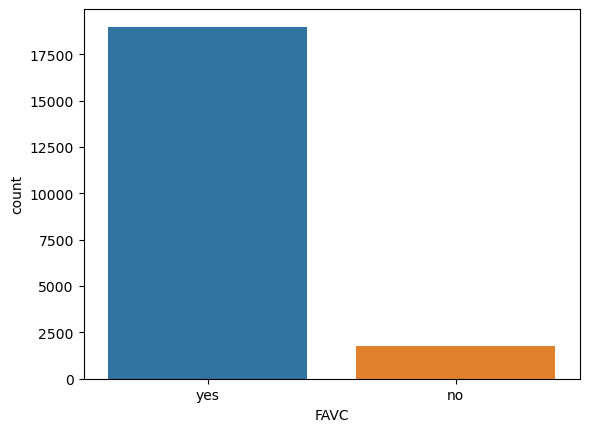

In [62]:
sns.countplot(x = 'FAVC', data = df_treino)

# FCVC

<Axes: xlabel='FCVC', ylabel='Count'>

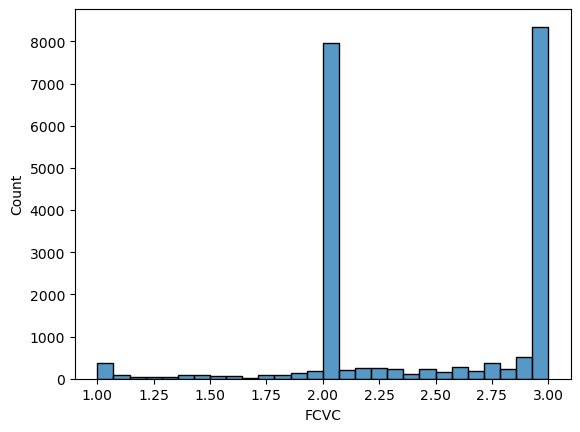

In [63]:
sns.histplot(x = 'FCVC', data = df_treino)

# NCP

<Axes: xlabel='NCP', ylabel='Count'>

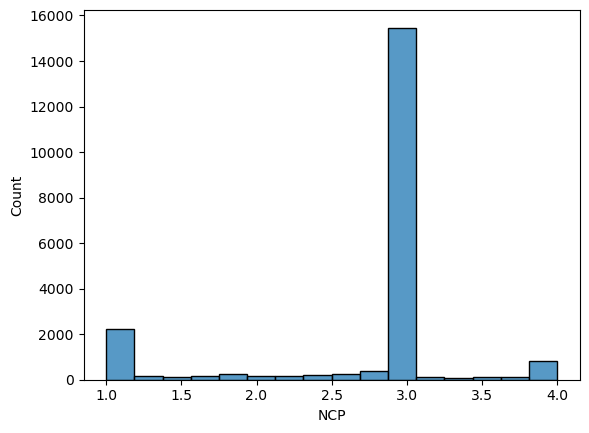

In [64]:
sns.histplot(x = 'NCP', data = df_treino)

# CAEC

<Axes: xlabel='CAEC', ylabel='count'>

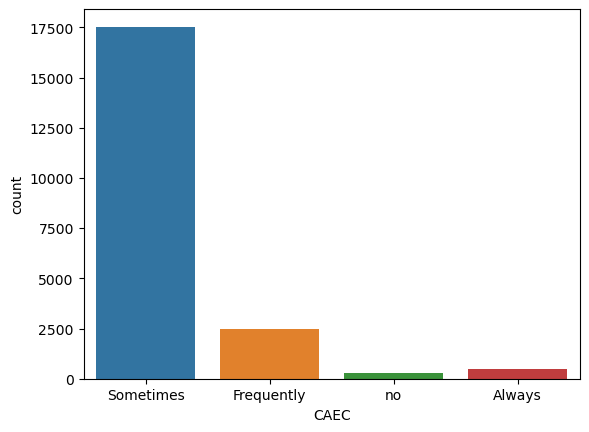

In [65]:
sns.countplot(x = 'CAEC', data = df_treino)

# SMOKE

<Axes: xlabel='SMOKE', ylabel='count'>

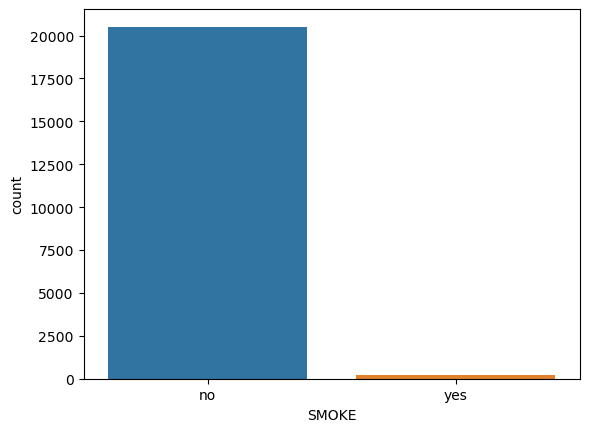

In [66]:
sns.countplot(x = 'SMOKE', data = df_treino)

# CH2O

<Axes: xlabel='CH2O', ylabel='Count'>

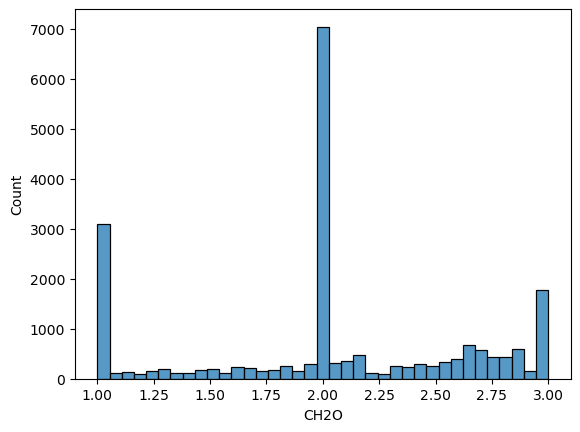

In [67]:
sns.histplot(x = 'CH2O', data = df_treino)

# SCC

<Axes: xlabel='SCC', ylabel='count'>

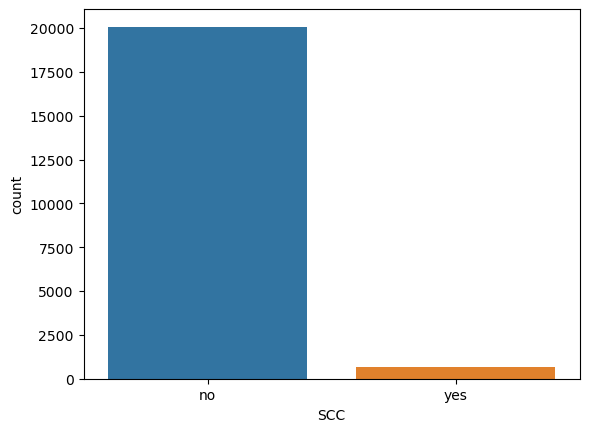

In [68]:
sns.countplot(x = 'SCC', data = df_treino)

# FAF

<Axes: xlabel='FAF', ylabel='Count'>

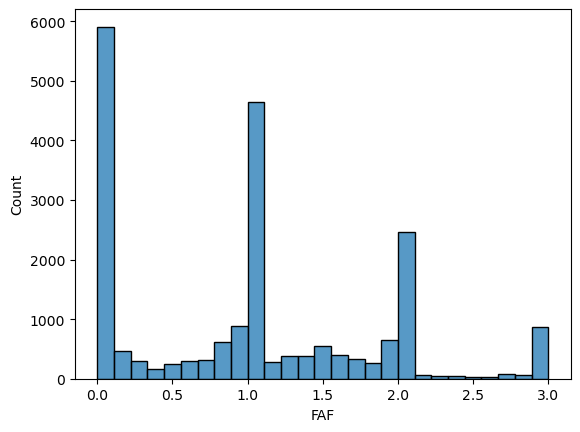

In [69]:
sns.histplot(x = 'FAF', data = df_treino)

# TUE

<Axes: xlabel='TUE', ylabel='Count'>

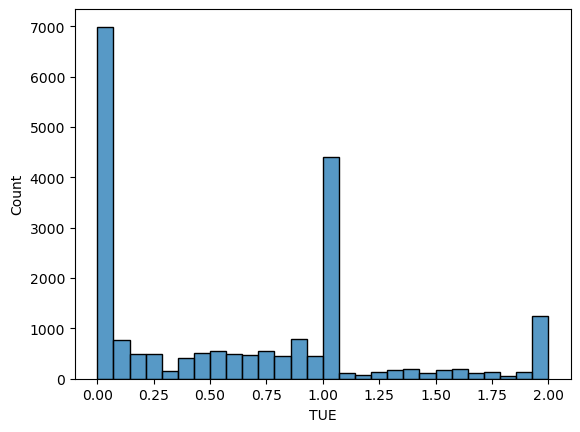

In [70]:
sns.histplot(x = 'TUE', data = df_treino)

# CALC

<Axes: xlabel='CALC', ylabel='count'>

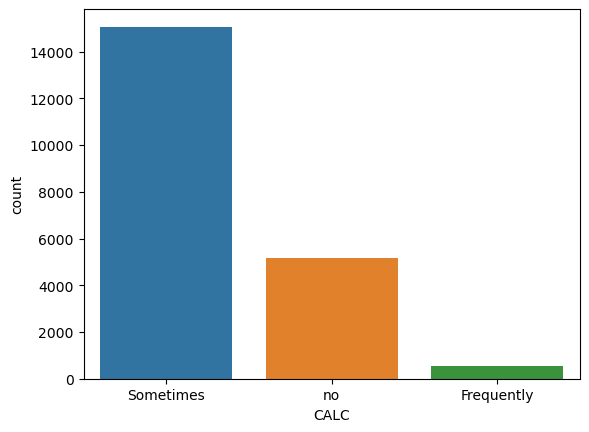

In [71]:
sns.countplot(x = 'CALC', data = df_treino)

# MTRANS

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Public_Transportation'),
  Text(1, 0, 'Automobile'),
  Text(2, 0, 'Walking'),
  Text(3, 0, 'Motorbike'),
  Text(4, 0, 'Bike')])

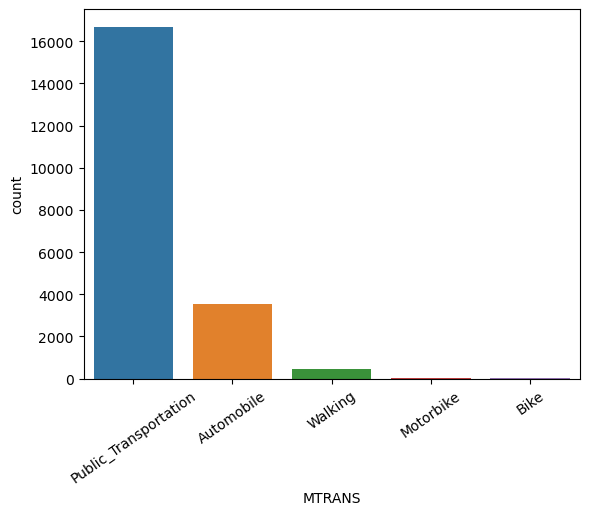

In [72]:
sns.countplot(x = 'MTRANS', data = df_treino)
plt.xticks(rotation = 35)

# FEATURE ENGINEERING

Vamos criar algumas novas variáveis para o nosso modelo. 

In [73]:
df_treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [74]:
df_treino.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [75]:
df_treino['IMC'] = df_treino['Weight'] / (df_treino['Height'] ** 2)
df_treino['Indice_CV'] = df_treino['FCVC'] / df_treino['NCP']
df_treino['Indice_AF'] = df_treino['FAF'] - df_treino['TUE']

Vamos explicar a criação das 3 novas variáveis. 

A primeira variável, IMC (Índice de massa corporal), é uma medida para verificar se a pessoa tem um peso saudável para a sua altura. A sua fórmula é escrita pelo peso dividido pela altura, altura esta que é elevado ao quadrado.

A segunda variável, Indice CV (Consumo de Vegetais), é uma medida para verificar a relação entre o consumo de vegetais, representado pela variávei FCVC e o número total de refeições por dia. Isto pode indicar o hábito no consumo de alimentos.

A terceira variável, Indice AF (Atividade Física), é uma medida para verificar a relação entre a atividade física e o tempo gasto em dispositivos tecnológicos. Ela pode indicar o nível geral de atividades físicas versus o tempo gasto em tecnologia.

In [76]:
df_treino.drop(columns = 'id', inplace = True)

In [77]:
df_treino.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,IMC,Indice_CV,Indice_AF
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II,28.259565,0.670399,-0.976473
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight,23.422091,0.666667,0.000000
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight,17.126706,1.332120,-0.807539
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III,44.855798,1.000000,0.687664
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II,25.599151,1.359220,1.036252


Tendo já feito as alterações nos dados de treino, vamos alterar agora os dados de teste.

In [78]:
df_teste.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


In [79]:
df_teste['CALC'] = df_teste['CALC'].replace('Always', 'Frequently')

In [80]:
df_teste['IMC'] = df_teste['Weight'] / (df_teste['Height'] ** 2)
df_teste['Indice_CV'] = df_teste['FCVC'] / df_teste['NCP']
df_teste['Indice_AF'] = df_teste['FAF'] - df_teste['TUE']

In [81]:
df_teste_submission = df_teste.drop(columns = 'id')

# Conclusão: escolha do modelo.

Tendo como base os dados de treino do nosso dataset, que apresenta uma assimetria e um desbalanceamento dos dados nas variáveis de entrada, então temos que ter cuidado em escolhermos o tipo de modelo que usaremos.

Escolheremos modelos robustos ao desbalanceamento. O nosso modelo escolhido será o algoritmo Random Forest.

In [82]:
X = df_treino.drop(columns = 'NObeyesdad')
y = df_treino['NObeyesdad'].copy() 


cols_num = list(set(X.select_dtypes('number')))
cols_cat = list(set(X.select_dtypes('object')))

pipe_cat = Pipeline([('encoder', OneHotEncoder())])
pipe_num = Pipeline([('std_scaler', StandardScaler())])

preprocessor = ColumnTransformer([('numeric', pipe_num, cols_num),
                                  ('categoric', pipe_cat, cols_cat)])

preprocessor

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('std_scaler',
                                                  StandardScaler())]),
                                 ['NCP', 'FCVC', 'CH2O', 'Weight', 'Height',
                                  'Indice_AF', 'Age', 'TUE', 'Indice_CV', 'FAF',
                                  'IMC']),
                                ('categoric',
                                 Pipeline(steps=[('encoder', OneHotEncoder())]),
                                 ['SCC', 'SMOKE',
                                  'family_history_with_overweight', 'CAEC',
                                  'FAVC', 'MTRANS', 'Gender', 'CALC'])])

In [83]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.33, random_state = 42)

X_treino_preprocessado = preprocessor.fit_transform(X_treino)
X_teste_preprocessado = preprocessor.transform(X_teste)

# Random Forest Classifier 

In [84]:
modelo_random_forest = RandomForestClassifier()
modelo_random_forest.fit(X_treino_preprocessado, y_treino)

previsoes_random_forest = modelo_random_forest.predict(X_teste_preprocessado)
acuracia_random_forest = accuracy_score(y_teste, previsoes_random_forest)
print('Acurácia do modelo Random Forest:', acuracia_random_forest)

Acurácia do modelo Random Forest: 0.8931542840461246


Notamos que o algoritmo Random Forest obteve uma acurácia de 89%, vamos otimiza-lo.

# Otimização de hiperparâmetros

Iremos otimizar nosso espaço de hiperparâmetros com o RandomizedSearchCV ao invés do GridSearchCV. O motivo é pelo fato de ser mais rápido e utilizar menos recursos computacionais.

In [85]:
from sklearn.model_selection import KFold, RandomizedSearchCV

cv = KFold(n_splits = 5, shuffle = True)

espaco_de_parametros = {
    'n_estimators' : [50, 100, 150, 200, 250, 300],
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [4, 6, 8, 10, 12, 14, 16, 18, 20],
    'min_samples_leaf' : [4, 6, 8, 10, 12, 14, 16, 18, 20],
    'min_samples_split' : [6, 8, 10, 12, 14, 16, 18, 20]}

randomized_rf = RandomizedSearchCV(
    modelo_random_forest,
    espaco_de_parametros,
    n_iter = 5,
    cv = cv,
    scoring = 'accuracy',
    n_jobs = -1
)

randomized_rf.fit(X_treino_preprocessado, y_treino)
modelo_final = randomized_rf.best_estimator_

# Submission Kaggle

Iremos mandar agora o nosso projeto para o Kaggle. Projeto este que utilizamos um algoritmo RandomForest e otimizamos os hiperparâmetros utilizando o RandomizedSearchCV

In [86]:
df_teste_preprocessado = preprocessor.transform(df_teste_submission)

In [87]:
df_teste_preprocessado.shape

(13840, 33)

In [88]:
predicao_final = modelo_final.predict(df_teste_preprocessado)

In [89]:
submission  = pd.DataFrame({
    "id": df_teste["id"],
    "NObeyesdad": predicao_final
})
submission.to_csv("submission.csv", index=False)

In [90]:
from IPython.display import HTML

display(HTML("<a href='submission.csv' download='submission.csv'>Clique aqui para baixar o arquivo CSV</a>"))

Um score de 0.89631 utilizando Random Forest e RandomizedSearchCV.